In 2002, the Oakland A's want to make to the playoffs but have a limited budget. Billy Beane, the General Manager of the Oakland A's, along with his assistant Paul DePodesta, used statistical analysis to identify the key statistics contributing to team success and built a competitive team. The A's won 103 games in 2002, despite having the third-lowest payroll in the league, and made it to the playoffs while setting an American League record of 20 consecutive wins.

The dataset contains baseball statistics from 1962 to 2012. It includes features such as Runs Scored (RS), Runs Allowed (RA), On-base Percentage (OBP), Slugging Percentage (SLG), Batting Average (BA), Opponent's On-base Percentage (OOBP), and Opponent's Slugging Percentage (OSLG). The analysis will focus on data before 2002 to align with the Moneyball strategy timeframe.

[Kaggle Dataset](https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012/data) Accessed on 2025 20 February

1) **Exploratory Data Analysis**: Subset the data to include data from 1962 to 2002. Conduct an exploratory data analysis to understand the distribution of the target variable (Runs Scored) and the relationships between the target and predictor variables. Include visualizations and summary statistics to support your analysis.

In [1]:
import pandas as pd
import numpy as np

# load dataset
data = pd.read_csv('baseball.csv')

data

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [2]:
# summary statistics
data.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


Text(0.5, 1.0, 'Distribution of Runs Scored')

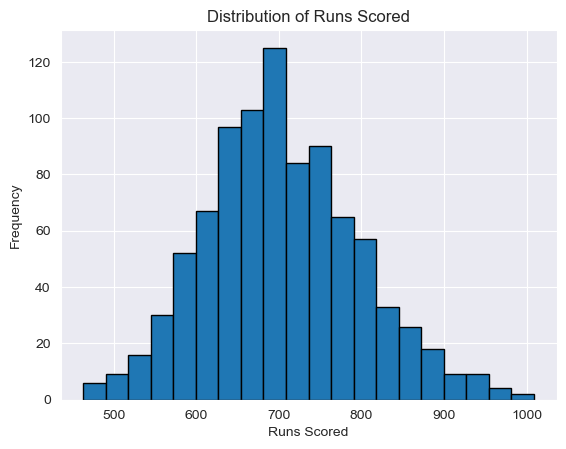

In [3]:
import matplotlib.pyplot as plt

# subset data for years 1962 to 2002 (exclusive)
baseball = data[(data['Year'] >= 1962) & (data['Year'] < 2002)]

# RS distribution
plt.hist(baseball['RS'], bins=20, edgecolor='black')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored')

The distribution of RS for the subset of the data (1972 to 2002) is slightly right skewed, with the highest frequencies falling between 600 and 800 RS, with a range of approximately 463 to 1009 runs scored, and a mean of about 705 runs scored.

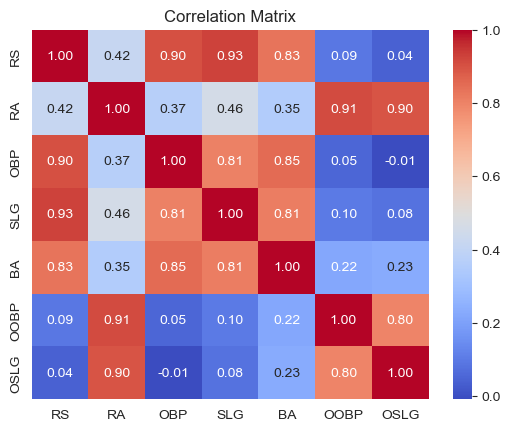

In [4]:
# relationships between target and predictor variables
import seaborn as sns

# correlation matrix
corr = baseball[['RS', 'RA', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']].corr()

# heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We see from the generated correlation matrix that RS has a strong positive correlation with OBP (0.90), SLG (0.92), and BA (0.83). There is very little correlation with OOBP (0.04) and OSLG (0.03).

2. **Wins to Playoffs*: DePosta analyzed that the team with at least 95 wins almost always makes it to the playoffs. Verify this claim by plotting the scatter plot of Wins vs Teams and color the points whether the team made it to the playoffs or not. The x-axis should represent the number of wins, and the y-axis should represent the team name.

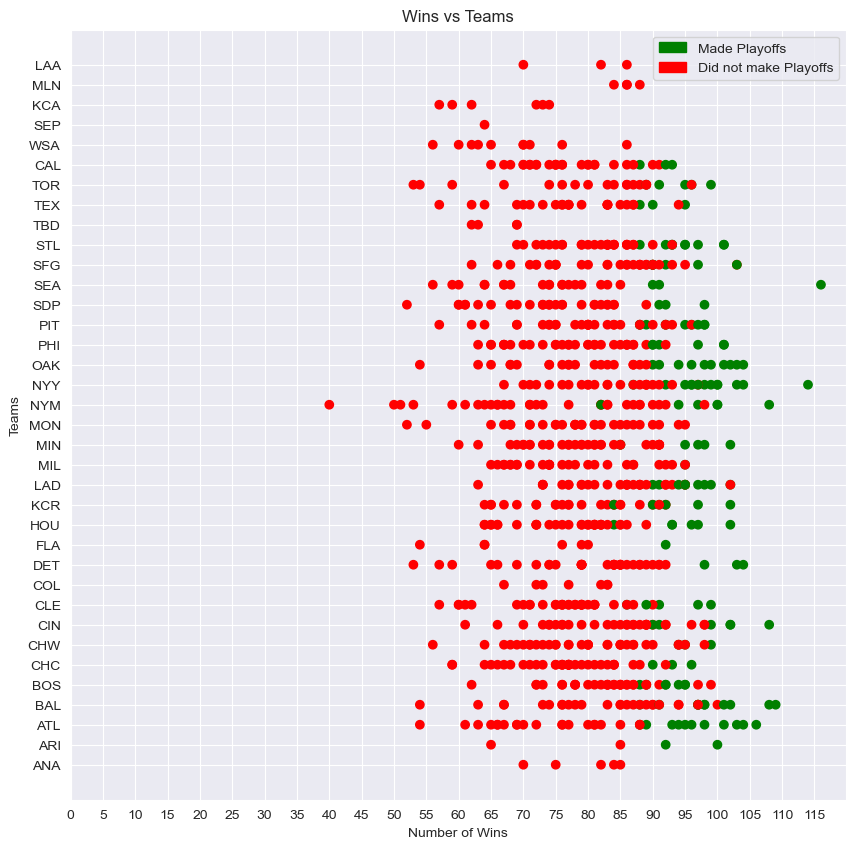

In [5]:
import matplotlib.patches as mpatches

# scatter plot of Wins vs Teams
plt.figure(figsize=(10, 10))
colors = baseball['Playoffs'].map({1:'green', 0: 'red'})
plt.scatter(baseball['W'], baseball['Team'], c=colors)
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.title('Wins vs Teams')

plt.xticks(np.arange(0, data['W'].max() + 1, 5))

green_patch = mpatches.Patch(color='green', label='Made Playoffs')
red_patch = mpatches.Patch(color='red', label='Did not make Playoffs')
plt.legend(handles=[green_patch, red_patch])

plt.show()

3. **Runs to score:** The next question is how many runs a team need to score to make it to the playoffs. Calculate the Run Difference (RD) of the teams. The Run Difference is the difference between Runs Scored and Runs Allowed. Plot the scatter plot of Run Difference vs Wins and color the points whether the team made it to the playoffs or not. The x-axis should represent the Run Difference, and the y-axis should represent the number of wins. What type of relationship do you observe between Run Difference and Wins?

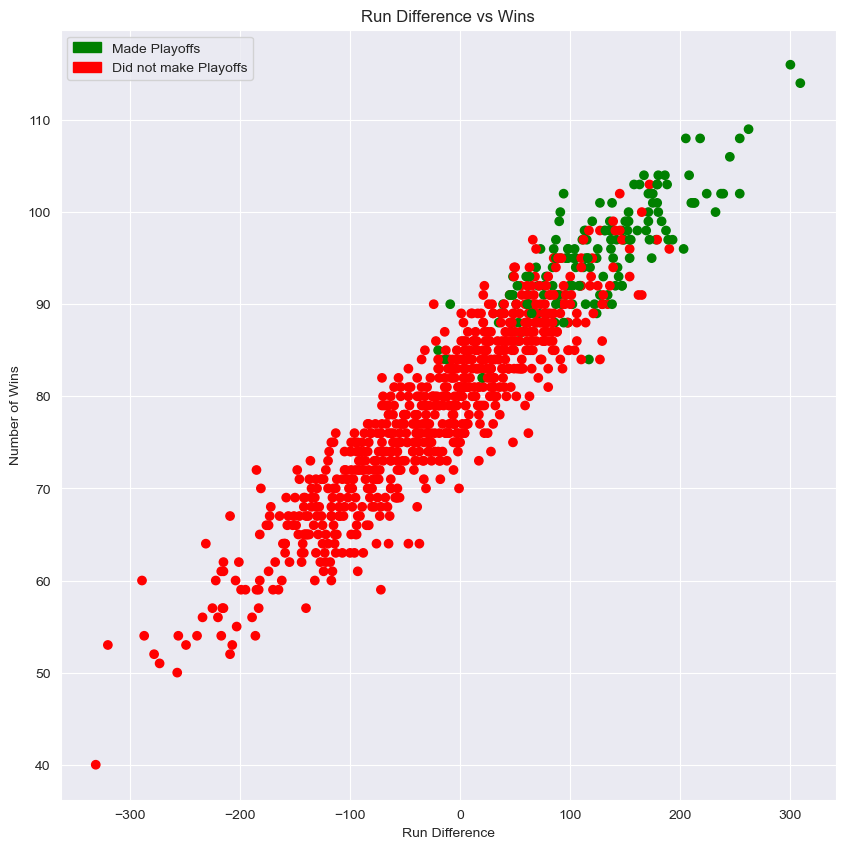

In [6]:
# calculate Run Difference
baseball.loc[:, 'RD'] = baseball['RS'] - baseball['RA']

# scatter plot of Run Difference vs Wins
plt.figure(figsize=(10, 10))
colors = baseball['Playoffs'].map({1:'green', 0: 'red'})
plt.scatter(baseball['RD'], baseball['W'], c=colors)
plt.xlabel('Run Difference')
plt.ylabel('Number of Wins')
plt.title('Run Difference vs Wins')

green_patch = mpatches.Patch(color='green', label='Made Playoffs')
red_patch = mpatches.Patch(color='red', label='Did not make Playoffs')
plt.legend(handles=[green_patch, red_patch])

plt.show()

We see that there is a positive linear relationship between Run Difference and Wins. Teams with a higher Run Difference tend to have more wins, which increases their chances of making it to the playoffs.

4. **Wins Regression**: Split the dataset into training and testing sets using an 80-20 split. Develop a linear regression model to predict Wins based on Run Difference and evaluate the model's performance using the testing dataset by calculating the Mean Squared Error (MSE) and R-squared values. Write the equation of the regression model (by giving out coefficients and intercepts). Determine the Run Difference needed to achieve 95 wins (playoff threshold).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split dataset
X = baseball[['RD']]
y = baseball['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error using Linear Regression to predict Wins based on RD: {mse}')
print(f'R-squared using Linear Regression to predict Wins based on RD: {r2}')

Mean Squared Error using Linear Regression to predict Wins based on RD: 15.254516089331169
R-squared using Linear Regression to predict Wins based on RD: 0.8877914257251179


In [8]:
# get coefficients and intercept
coef = model.coef_[0]
wins_intercept = model.intercept_

print(f'Equation of the regression model: Wins = {coef:.3f} * RD + {wins_intercept:.3f}')

Equation of the regression model: Wins = 0.105 * RD + 80.841


In [9]:
# Run Difference needed to achieve 95 wins
rd_95_wins = (95 - wins_intercept) / coef
print(f'Run Difference needed to achieve 95 wins: {rd_95_wins}')

Run Difference needed to achieve 95 wins: 134.625080011648


5. **Runs Scored**: The A's discovered that the On-base Percentage (OBP) and Slugging Percentage (SLP) are the key statistics contributing to team success. Conduct a linear regression analysis to predict Runs Scored based on OBP and SLG. Write the equation of the regression model (by giving out coefficients and intercepts).

In [10]:
# linear regression analysis
X = baseball[['OBP', 'SLG']]
y = baseball['RS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error using Linear Regression to predict Runs Scored based on OBP and SLG: {mse}')
print(f'R-squared using Linear Regression to predict Runs Scored based on OBP and SLG: {r2}')

Mean Squared Error using Linear Regression to predict Runs Scored based on OBP and SLG: 703.4266428378961
R-squared using Linear Regression to predict Runs Scored based on OBP and SLG: 0.9163403550826678


In [11]:
# get coefficients and intercept
coef_obp, coef_slg = model.coef_
rs_intercept = model.intercept_

print(f'Equation of the regression model: RS = {coef_obp:.3f} * OBP + {coef_slg:.3f} * SLG + {rs_intercept:.3f}')

Equation of the regression model: RS = 2683.819 * OBP + 1604.976 * SLG + -794.444


6. **Runs Allowed**: Conduct a linear regression analysis to predict Runs Allowed based on Opponent's On-base Percentage (OOBP) and Opponent's Slugging Percentage (OSLG). Write the equation of the regression model (by giving out coefficients and intercepts).

In [12]:
# now predict Runs Alowed based on OOBP and OSLG

# drop rows with missing values
baseball = baseball.dropna(subset=['OOBP', 'OSLG'])

X = baseball[['OOBP', 'OSLG']]
y = baseball['RA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error using Linear Regression to predict Runs Allowed based on OOBP and OSLG: {mse}')
print(f'R-squared using Linear Regression to predict Runs Allowed based on OOBP and OSLG: {r2}')

Mean Squared Error using Linear Regression to predict Runs Allowed based on OOBP and OSLG: 964.0556140016974
R-squared using Linear Regression to predict Runs Allowed based on OOBP and OSLG: 0.8510085501739364


In [13]:
# get coefficients and intercept
coef_oobp, coef_oslg = model.coef_
ra_intercept = model.intercept_

print(f'Equation of the regression model: RA = {coef_oobp:.3f} * OOBP + {coef_oslg:.3f} * OSLG + {ra_intercept:.3f}')

Equation of the regression model: RA = 2899.684 * OOBP + 1470.050 * OSLG + -812.736


7. **Wins Prediction**: Assume that the A's have the same OBP, SLG, OOBP, and OSLG as the previous year i.e. {'OBP': 0.339, 'SLG': 0.432, 'OOBP': 0.315, 'OSLG': 0.384}. Use the regression models developed in tasks 4, 5, and 6 to predict the number of wins for the Oakland A's in 2002. Compare the predicted wins with the actual wins and provide insights into the team's performance.

In [14]:
obp = 0.339
slg = 0.432
oobp = 0.315
oslg = 0.384

# predict Runs Scored
rs = coef_obp * obp + coef_slg * slg + rs_intercept

# predict Runs Allowed
ra = coef_oobp * oobp + coef_oslg * oslg + ra_intercept

# predict Wins
rd = rs - ra
wins = coef * rd + wins_intercept

print(f'Run difference: {rd}')
print(f'Predicted Wins for the Oakland A\'s in 2002: {wins}')

Run difference: 143.55653726769242
Predicted Wins for the Oakland A's in 2002: 95.93936046926153


In [15]:
# show oakland a's data from 2002
# oak_2002 = data[(data['Year'] == 2002) & (data['Team'] == 'OAK')]
# oak_2002

# alternatively get just the number of wins
actual_wins = data[(data['Year'] == 2002) & (data['Team'] == 'OAK')]['W'].values[0]
print(f'Actual Wins for the Oakland A\'s in 2002: {actual_wins}')

Actual Wins for the Oakland A's in 2002: 103


In [16]:
# calculate percentage error
percentage_error = abs(wins - actual_wins) / actual_wins * 100

print(f'Percentage Error: {percentage_error:.2f}%')

Percentage Error: 6.85%


The predicted wins for the Oakland A's in 2002 was about 96, while the actual wins were 103. The percentage error was approximately 6.85%, a relatively low error rate. This is consistent with the analysis that a team with at least 95 wins almost always makes it to the playoffs, and shows that using the features OBP, SLG, OOBP, and OSLG can provide a good prediction of team performance. We also saw the predicted RD is about 143, consistent with the earlier finding of needing about at least 135 RD to achieve at least 95 wins. Of course, the percentage error of 6.85% being low or high is subjective and depends on the context of the analysis - I'm personally not a sports analyst nor am I really aware of how baseball works, so it's hard for me to conclusively say if this current model is "good enough" or acceptable for industry use or not.